## U shape PHP dynamics with multiple liquid slugs - with heat transfer

In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
using DifferentialEquations

In [3]:
using CartesianGrids

In [4]:
cd(dirname(pwd()))
cd("src") 


include("Systems.jl")
using ..Systems

include("Tools.jl")
using ..Tools


include("Thermomodel.jl")
using ..Thermomodel

include("Postprocessing.jl")
using ..Postprocessing

cd(dirname(pwd()))

## Parameters of the PHP

In [5]:
    ω0 = [sqrt(1.2e004), sqrt(1.2e004),sqrt(1.2e004), sqrt(1.2e004),sqrt(1.2e004), sqrt(1.2e004),sqrt(1.2e004), sqrt(1.2e004)];
    ℘ = [1.2e005, 1.2e005,1.2e005, 1.2e005,1.2e005, 1.2e005,1.2e005, 1.2e005];


     Θ = 0.15;
    θe = 1 + Θ;
    θc = 1 - Θ;
    
    He = 3000.0;
    Hc = 3000.0;
    
    X0 = 0.5;

    γ = 1.4;

In [6]:
    L = 24.0  # total length of the pipe when streched to a 1D pipe
    L2D = 2.0 # the actual length of the bended pipe in the real world
    angle = pi/2 # inclination angle 
    α = 5 # nondimensional thermal diffusivity = (4 αₐ d^2) / (ν Lₕ^2)

5

## Pipe definition

In [7]:
tube = Tube(L,L2D,angle,α)

Tube(24.0, 2.0, 1.5707963267948966, 5.0)

## Evaporator and condenser definition

In [8]:
Xe = map(tuple, [0.0; 3.0; 7.0; 11.0; 15.0; 19.0; 23.0], [1.0; 5.0; 9.0; 13.0; 17.0; 21.0; 24.0])
evap = Evaporator(He,θe,Xe)

Evaporator(3000.0, 1.15, Tuple{Float64,Float64}[(0.0, 1.0), (3.0, 5.0), (7.0, 9.0), (11.0, 13.0), (15.0, 17.0), (19.0, 21.0), (23.0, 24.0)])

In [9]:
Xc = map(tuple, [1.0; 5.0; 9.0; 13.0; 17.0; 21.0], [3.0; 7.0; 11.0; 15.0; 19.0; 23.0])
cond = Condenser(Hc,θc,Xc)

Condenser(3000.0, 0.85, Tuple{Float64,Float64}[(1.0, 3.0), (5.0, 7.0), (9.0, 11.0), (13.0, 15.0), (17.0, 19.0), (21.0, 23.0)])

## Vapor plug and liquid slug initialization

In [10]:
X0 = [(0.5,2.5),(5.0,7.0),(7.5,8.0),(9.0,12.0),(14.0,15.0),(16.2,17.6),(20.0,21.0),(21.6,23.2)]
dXdt0 = [(0.0,0.0),(0.0,0.0),(0.0,0.0),(0.0,0.0),(0.0,0.0),(0.0,0.0),(0.0,0.0),(0.0,0.0)]
liquids=LiquidSlug(γ,ω0,℘,X0,dXdt0)

LiquidSlug(1.4, [109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323], [120000.0, 120000.0, 120000.0, 120000.0, 120000.0, 120000.0, 120000.0, 120000.0], Tuple{Float64,Float64}[(0.5, 2.5), (5.0, 7.0), (7.5, 8.0), (9.0, 12.0), (14.0, 15.0), (16.2, 17.6), (20.0, 21.0), (21.6, 23.2)], Tuple{Float64,Float64}[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0)])

In [11]:
P = [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0];
vapors=VaporPlug(γ,P)

VaporPlug(1.4, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

## Construct the system

In [12]:
sys0 = PHPSystem(tube,evap,cond,liquids,vapors)

PHPSystem(Tube(24.0, 2.0, 1.5707963267948966, 5.0), Evaporator(3000.0, 1.15, Tuple{Float64,Float64}[(0.0, 1.0), (3.0, 5.0), (7.0, 9.0), (11.0, 13.0), (15.0, 17.0), (19.0, 21.0), (23.0, 24.0)]), Condenser(3000.0, 0.85, Tuple{Float64,Float64}[(1.0, 3.0), (5.0, 7.0), (9.0, 11.0), (13.0, 15.0), (17.0, 19.0), (21.0, 23.0)]), LiquidSlug(1.4, [109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323], [120000.0, 120000.0, 120000.0, 120000.0, 120000.0, 120000.0, 120000.0, 120000.0], Tuple{Float64,Float64}[(0.5, 2.5), (5.0, 7.0), (7.5, 8.0), (9.0, 12.0), (14.0, 15.0), (16.2, 17.6), (20.0, 21.0), (21.6, 23.2)], Tuple{Float64,Float64}[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0)]), VaporPlug(1.4, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]))

In [13]:
typeof(sys0)

PHPSystem

## Construct the state vector U

In [14]:
Lvaporplug = XptoLvaporplug(X0,sys0.tube.L)
M = P.^(1/γ).* Lvaporplug
u=XMtovec(X0,dXdt0,M)

41-element Array{Float64,1}:
  0.5               
  2.5               
  5.0               
  7.0               
  7.5               
  8.0               
  9.0               
 12.0               
 14.0               
 15.0               
 16.2               
 17.6               
 20.0               
  ⋮                 
  0.0               
  0.0               
  0.0               
  0.5               
  2.5               
  0.5               
  1.0               
  2.0               
  1.1999999999999993
  2.3999999999999986
  0.6000000000000014
  0.8000000000000007

## Solve the constructed ODE for U

In [15]:
tstep=1.0e-5

p = sys0
tspan = (0.0, 0.05);
prob = ODEProblem(zhang2002model!, u, tspan, p)
sol = solve(prob, RK4(), adaptive=false, dt=tstep);
# sol = solve(prob, RK4(), adaptive=false, dt=tstep, callback=cb);

## plotting U

In [16]:
result1=soltoResult(sol,sys0);
MatrxXp, MatrxdXdt, MatrxM=soltoMatrxResult(sol,sys0);


In [17]:
ΔMatrxXp = zeros(size(MatrxXp,1)+1,size(MatrxXp,2))
ΔMatrxXp[1,:] = MatrxXp[1,:]
ΔMatrxXp[end,:] .= sys0.tube.L .- MatrxXp[end,:]
for i = 2:size(MatrxXp,1)
    ΔMatrxXp[i,:] = MatrxXp[i,:]-MatrxXp[i-1,:]
end


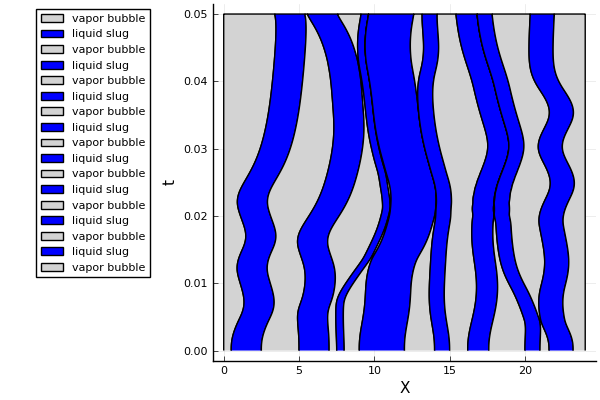

In [33]:
portfoliocomposition(ΔMatrxXp', sol.t, legend = :outertopleft, color = [:lightgrey :blue],ylabel="t", xlabel="X", labels = ["vapor bubble" "liquid slug"])

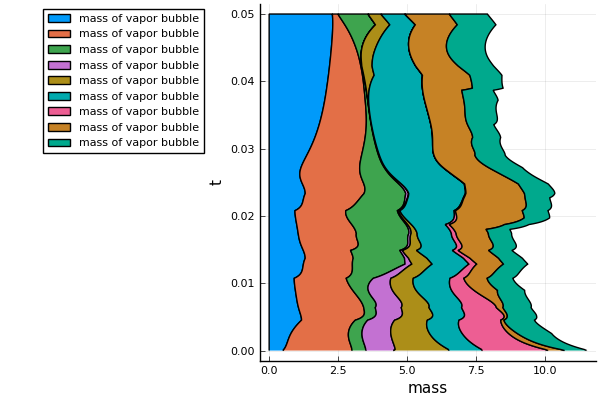

In [35]:
portfoliocomposition(MatrxM', sol.t, legend = :outertopleft, labels = ("mass of vapor bubble"), ylabel="t", xlabel="mass")